## Project: Classifying Heart Disease using Logistic Regression

In this project we are going to use the machine learning pipeline, starting from examining the dataset itself to creating a polished classification model using binary logistic regression.

We'll use a real-life dataset: the Heart Disease Data Set from [the UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). The dataset contains data from the  Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. The original dataset contains 76 attributes, but in this analysis we will refer to only a subset of 14 of them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

![Image](https://images.unsplash.com/photo-1628348070889-cb656235b4eb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1740&q=80
    )
__Photo by Towfiqu barbhuiya on Unsplash__

In [2]:
heart=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 21/heart_disease.csv")

### Exploring the Dataset

In [3]:
heart

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

Description of the columns:

  * #3  `age` in years  
  * #4  `sex` (1 = male; 0 = female)      
  * #9  `cp` chest pain type
  
    -- Value 1: typical angina
    
    -- Value 2: atypical angina
    
    -- Value 3: non-anginal pain
    
    -- Value 4: asymptomatic       
  * #10 `trestbps` resting blood pressure (in mm Hg on admission to the hospital) 
  * #12 `chol` serum cholestoral in mg/dl     
  * #16 `fbs` (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)      
  * #19 `restecg`) resting electrocardiographic results
  
    -- Value 0: normal
    
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
  * #32 `thalach` maximum heart rate achieved  
  * #38 `exang` exercise induced angina (1 = yes; 0 = no)    
  * #40 `oldpeak` ST depression induced by exercise relative to rest  
  * #41 `slope`  the slope of the peak exercise ST segment
  
    -- Value 1: upsloping
    
    -- Value 2: flat
    
    -- Value 3: downsloping    
  * #44 `ca` number of major vessels (0-3) colored by flourosopy       
  * #51 `thal`  3 = normal; 6 = fixed defect; 7 = reversable defect     
  * #58 `present` diagnosis of heart disease (angiographic disease status)
  
    -- Value 0: < 50% diameter narrowing
    
    -- Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)      (the predicted attribute)

In [5]:
heart.head

<bound method NDFrame.head of      Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             1   63    1   1       145   233    1        2      150      0   
1             2   67    1   4       160   286    0        2      108      1   
2             3   67    1   4       120   229    0        2      129      1   
3             4   37    1   3       130   250    0        0      187      0   
4             5   41    0   2       130   204    0        2      172      0   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         299   45    1   1       110   264    0        0      132      0   
299         300   68    1   4       144   193    1        0      141      0   
300         301   57    1   4       130   131    0        0      115      1   
301         302   57    0   2       130   236    0        2      174      0   
302         303   38    1   3       138   175    0        0      173      0   

     oldpeak  slope  

The `present` column is our binary outcome of interest. 0 encodes the absence of any heart disease, while 1 encodes the presence.

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [7]:
heart["ca"].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [8]:
heart["thal"].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

We will drop the rows with '?' and turn the `ca` and `thal` columns into float.

In [9]:
heart = heart[heart['ca'] != '?']
heart = heart[heart['thal'] != '?']

In [10]:
heart['ca'] = heart['ca'].astype('float')
heart['thal'] = heart['thal'].astype('float')

In [11]:
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,87.323283,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,75.000000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,150.000000,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.000000,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Checking the target variable

array([[<AxesSubplot:title={'center':'present'}>]], dtype=object)

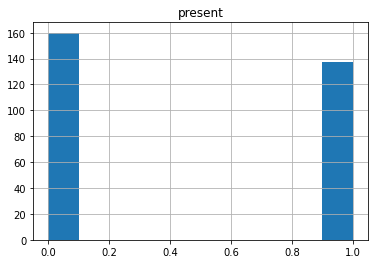

In [12]:
heart.hist("present")

### Dividing the Data

We'll need the following:

A training set that will be used to estimate the regression coefficients.

A test set that will be used to assess the predictive ability of the model. 

We'll use a 70-30 split of the dataset for the training and test sets.


In [13]:
X=heart.drop(["present"],axis=1)
y=heart["present"]
# 70% for training set, 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [14]:
# Check that both the training and test datasets have cases and non-cases
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  109
Y_train:  98
Y_test:  51
Y_test:  39


We confirm above that there are both cases and non-cases in both the training and test sets

We will scale the data because the dataset contain fetures that are greatly varying in range.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(heart)
heart = pd.DataFrame(scaler.transform(heart), columns = heart.columns)

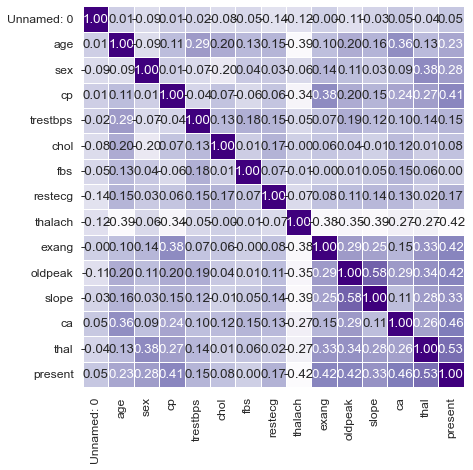

In [16]:
# Evaluating the correlation between variables 
plt.figure(figsize=(7,7))
correlations = heart.corr()

sns.set(font_scale=1.1)

sns.heatmap(correlations,
            annot=True,
            fmt='.2f',
            cmap='Purples',
            square=True,
            linewidths=1,
            cbar=False)

plt.show()

In [17]:
# Gets correlations with present
correlations['present'].sort_values(ascending=False)

present       1.000000
thal          0.526640
ca            0.463189
oldpeak       0.424052
exang         0.421355
cp            0.408945
slope         0.333049
sex           0.278467
age           0.227075
restecg       0.166343
trestbps      0.153490
chol          0.080285
Unnamed: 0    0.051891
fbs           0.003167
thalach      -0.423817
Name: present, dtype: float64

In [18]:
# Drops present
correlations = correlations.drop(['present'])

predictors = correlations['present'][correlations['present'] > 0.42].index
predictors

Index(['exang', 'oldpeak', 'ca', 'thal'], dtype='object')

* exang, 
* oldpeak, 
* ca, 
* thal seem like good candidates for predictors
Next, we will perform feature selection via the Split-Apply-Combine workflow. We are interested in which predictors are meaningfully different when comparing between the 0 and 1 classes.

In [19]:
heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
-0.925338,-0.210121,-0.257676,-0.378412,-0.142030,-0.074291,-0.002930,-0.153924,0.392174,-0.389896,-0.392391,-0.308183,-0.428606,-0.487319
1.080686,0.245397,0.300935,0.441941,0.165875,0.086763,0.003422,0.179765,-0.458013,0.455353,0.458267,0.359922,0.500562,0.569132


`thal`,`ca`, `oldpeak`,  `thalach`, `exang` seem like the best candidates (in this order)

We will also use the Recursive Feature Elimination algorithm 

In [20]:
X = heart.drop(['present'],axis=1)
y = heart["present"]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(heart["present"])

In [21]:
from sklearn.feature_selection import RFE
model=LogisticRegression(solver='lbfgs', max_iter=500)


In [22]:
rfe=RFE(model,n_features_to_select=4,step=1)
rfe=rfe.fit(X,y_label)
print(rfe.support_)
print(rfe.ranking_)
for feature in rfe.support_.nonzero():
    print(X.columns[feature])

[False False False  True False False False False False  True False False
  True  True]
[ 9 11  3  1  5 10  6  8  4  1  7  2  1  1]
Index(['cp', 'exang', 'ca', 'thal'], dtype='object')


### Building the Model

In [23]:
model = LogisticRegression()

X_train = X_train[['exang', 'oldpeak', 'ca', 'thal']]

X_test = X_test[['exang', 'oldpeak', 'ca', 'thal']]

model.fit(X_train, y_train)
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8260869565217391
Training Sensitivity:  0.7857142857142857
Training Specificity:  0.8623853211009175


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

model = LogisticRegression()

X_train = X_train[['thal','ca', 'oldpeak', 'thalach']]

X_test = X_test[['thal','ca', 'oldpeak', 'thalach']]

model.fit(X_train, y_train)
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8357487922705314
Training Sensitivity:  0.8061224489795918
Training Specificity:  0.8623853211009175


In [25]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

model = LogisticRegression()

X_train = X_train[["cp", "exang", "thal", "ca"]]

X_test = X_test[["cp", "exang", "thal", "ca"]]

model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8502415458937198
Training Sensitivity:  0.8061224489795918
Training Specificity:  0.8899082568807339


We will choose __"cp", "exang", "thal", "ca"__ as our predictors.

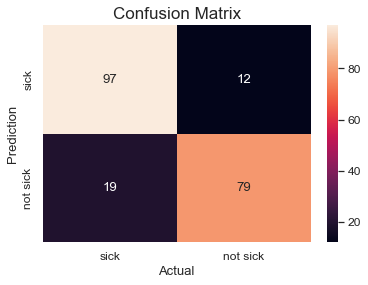

In [27]:
cm = confusion_matrix(y_train,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['sick', 'not sick'],
            yticklabels=['sick', 'not sick'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Our model does a reasonable job, we can see that there are higher count of false positives than there are false neagtives.
From, the sensitivity and specificity classificatoin metrics we can see that our model is ~9% better at predicting negatives than positives.

### Interpreting the Model Coefficients

Examine the coefficients of your logistic regression model on both the log-odds and odds scales

In [28]:
coefs = ["cp", "exang", "thal", "ca"]

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

cp : 0.52
exang : 0.57
thal : 0.92
ca : 1.08


In [29]:
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

cp : 1.69
exang : 1.77
thal : 2.51
ca : 2.96


The odds of someone with an exercise induced angina and having a heart disease are 2.9 the odds of someone who doesnt have a exercise induced angina and has cancer  holding the other predictors constant. We can conclude that the coefficients seem to make sense, having  a high odd ratio, meaning that is they're present, then it is more likely to have a heart disease.

### Final Model Evaluation

Next, we will assess the predictive ability of our logistic regression model.

In [30]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.8444444444444444
Test Sensitivity:  0.7692307692307693
Test Specificity:  0.9019607843137255


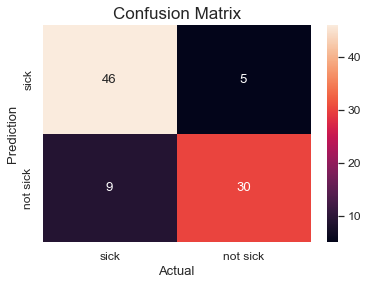

In [31]:
cm = confusion_matrix(y_test,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['sick', 'not sick'],
            yticklabels=['sick', 'not sick'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Our specificity is higher than in training. Accuracy didn't drop too much and the difference between sensitivity and specificity improved.

### Drawing Conclusions

After exploring the data and making some adjustments, we divided the data, choose some predictors based on the findings found from correlations, the Split-Apply-Combine workflow, the RFE algorthm. The model was fit to the training set, and the predictive ability was evaluated on the test set. We assessed the sensitivity, specificity, overall training and test accuracy of the model. We interpreted the model coefficients on both the log-odds and odds scales. to see if they make sense. The final model evaluation suggested an accuracy of 84%, sensitivity was 76%, and specificity was 90%.Test accuracy was 84%, sensitivity was 76%, and specificity was 90%. Compared to the training set, the accuracy didn't change much. The model might not be enough to replace an actual diagnosis but it could be used to bulk evaluate patient data to prioritise care. Model creation is an iterative process. The first model may not be the best one, but it can help inform how to create a better model in the future by
* Using different predictors
* Using a different number of predictors
* Using different models
* Using different training and testing sizes